In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [35]:
data=pd.read_csv('Advertising.csv')

Link to Dataset: https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset

In [36]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [37]:
data = data.drop(columns='Unnamed: 0')

In [38]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [40]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [41]:
#checking missing values
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


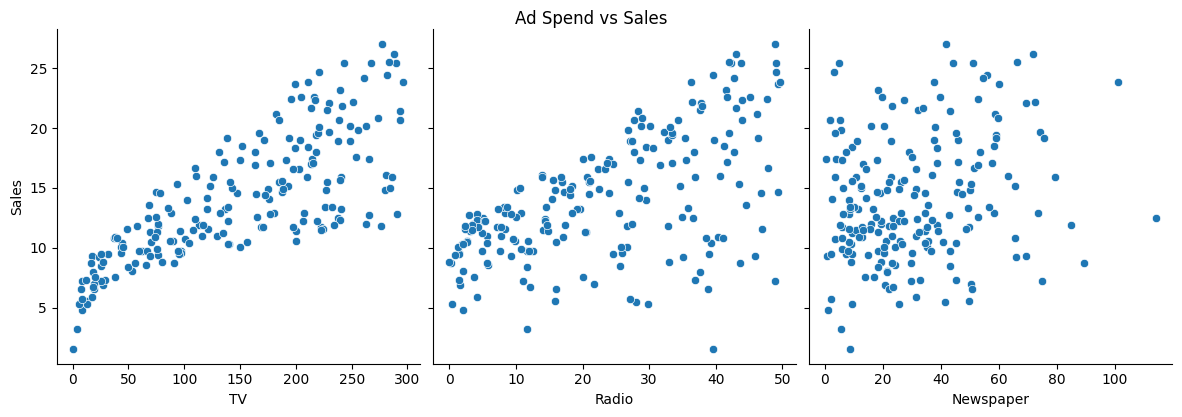

In [42]:
import matplotlib.pyplot as plt

# Visualize relationships
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Ad Spend vs Sales", y=1.02)
plt.show()



there's a strongly,moderately and weak positive correlation between Tv,Radio and newspaper to sales


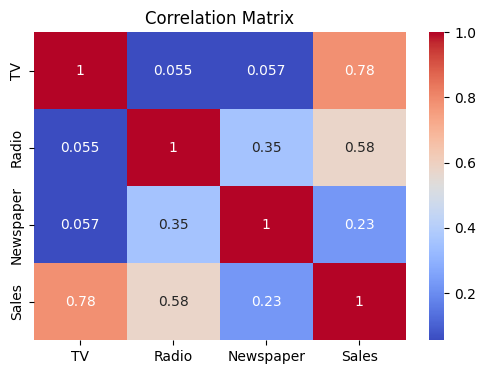

In [43]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

From the Heatmap it's noted that predicting sales(Target), TV ad spend is your most important feature.
Radio is useful but not as strong.
Newspaperas less significant.

In [44]:
#Lets assign our features and taget(dependent variable)
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = data['Sales']                      # Dependent variable


In [45]:
#splitting our data into training and testing
from sklearn.model_selection import train_test_split

# 80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
#Lets predict
y_pred = model.predict(X_test)


In [48]:
#lets evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]
R² Score: 0.899438024100912
MAE: 1.4607567168117603
RMSE: 1.78159966153345


 Excellent fit! the model explains ~90% of the variance in sales.

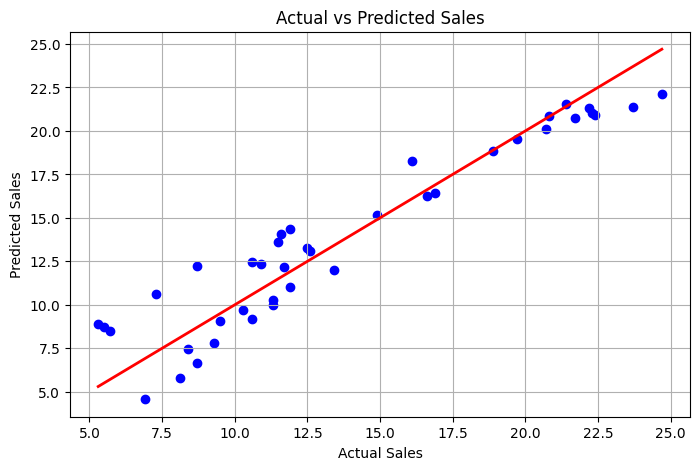

In [49]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


this is our Final eqn for manual Interpretation
Sales=2.98+0.045×TV+0.189×Radio+0.0028×Newspaper